In [14]:
# import all the library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
# read the dataset using pandas
data = pd.read_csv(r'C:\Users\Home\Desktop\Innomatics\dataframe_.csv')

In [16]:
# This displays the top 5 rows of the data
data.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [17]:
# Provides some information regarding the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [18]:
# this describes the basic stat behind the dataset used 
data.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [19]:
data.shape

(1697, 2)

In [20]:
data.columns

Index(['input', 'output'], dtype='object')

### data preprocessing

In [21]:
data.dtypes

input     float64
output    float64
dtype: object

#### handling missing values

In [23]:
"Error while converting input(float64) to (int64)"
"Cannot convert non-finite values (NA or inf) to integer"
"1ts we have to fill NA values"

'1ts we have to fill NA values'

In [24]:
from sklearn.impute import SimpleImputer

# Mean Imputer 
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data["input"] = pd.DataFrame(mean_imputer.fit_transform(data[["input"]]))
data["input"].isnull().sum()   

0

In [36]:
# Median Imputer
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
data["input"] = pd.DataFrame(median_imputer.fit_transform(data[['input']]))
data["input"].isnull().sum() 

0

In [26]:
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data["output"] = pd.DataFrame(mean_imputer.fit_transform(data[["output"]]))
data["output"].isnull().sum()  

0

In [37]:
# Median Imputer
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
data["output"] = pd.DataFrame(median_imputer.fit_transform(data[['output']]))
data["output"].isnull().sum() 

0

In [25]:
#type casting
# Now we will convert 'float64' into 'int64' type. 
data['input'] = data['input'].astype('int64') 
data['input'].dtypes

dtype('int64')

In [27]:
data['output'] = data['output'].astype('int64') 
data['output'].dtypes

dtype('int64')

#### handling duplicates

In [29]:
#Check for the duplicate values, and handle the duplicate values (ex. drop)"

#Identify duplicates records in the data
duplicate = data.duplicated()
sum(duplicate) 

632

In [30]:
#Removing Duplicates
data1 = data.drop_duplicates() 

#### EDA

In [32]:
#Do the data analysis (EDA)"
"Such as histogram, boxplot, scatterplot etc "
#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes 
import numpy as np

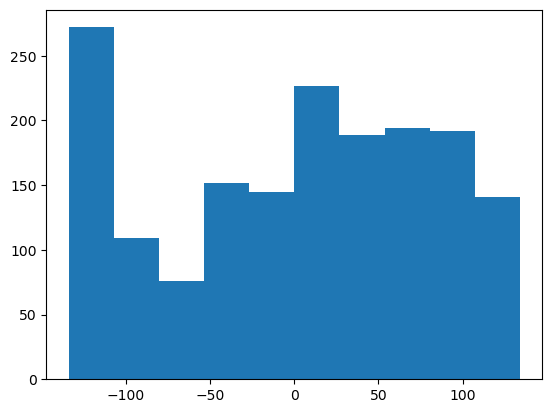

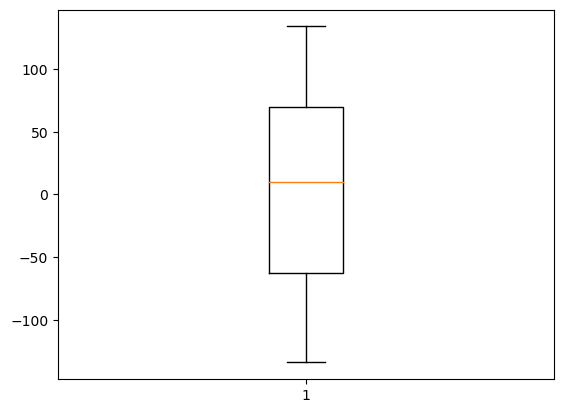

In [33]:
#input
plt.hist(data.input);plt.show() #histogram

plt.boxplot(data.input);plt.show() #boxplot

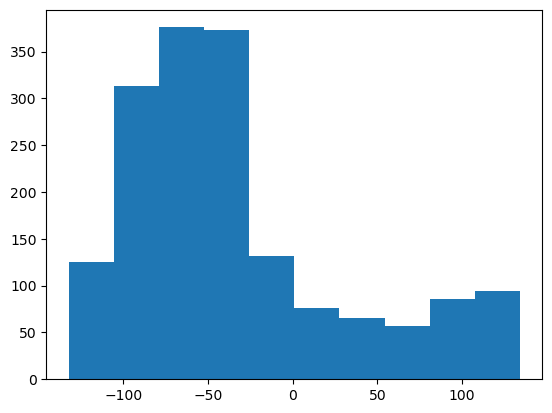

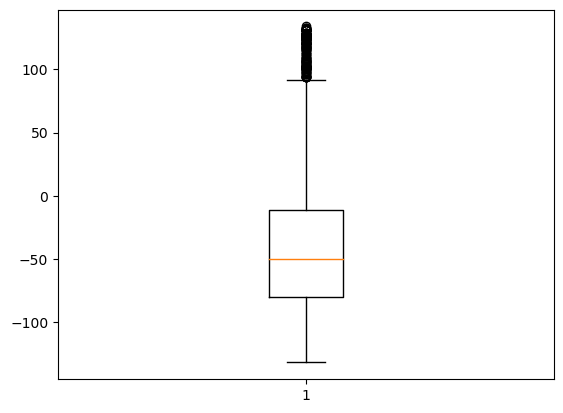

In [34]:
#UnitPrice
plt.hist(data.output);plt.show() #histogram

plt.boxplot(data.output);plt.show() #boxplot

#### handling outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


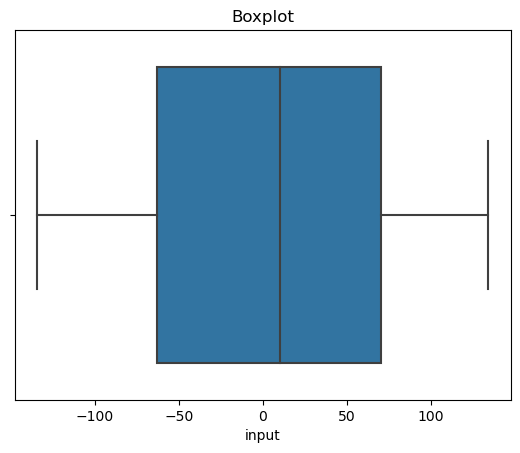

In [38]:
# let's find outliers 
sns.boxplot(data.input);plt.title('Boxplot');plt.show()  # no outliers present

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


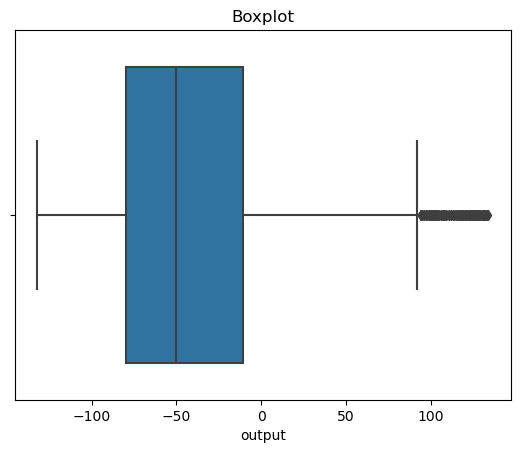

In [39]:
sns.boxplot(data.output);plt.title('Boxplot');plt.show() #outliers presented

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


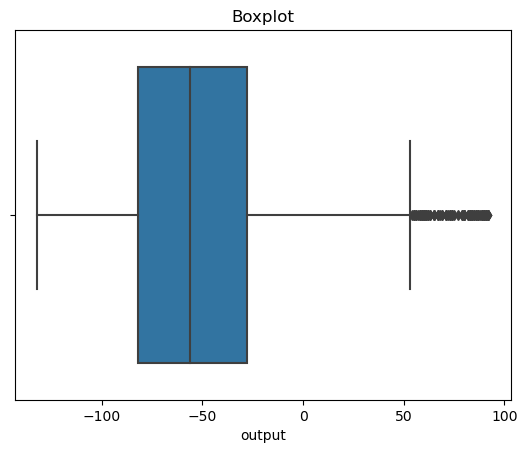

In [44]:
#output
# Detection of Outliers
IQR = data['output'].quantile(0.75) - data['output'].quantile(0.25) # IQR - Inter quartile range IQR = Q3-Q1
lower_limit = data['output'].quantile(0.25) - (IQR * 1.5) # Q1 - 1.5 * IQR
upper_limit = data['output'].quantile(0.75) + (IQR * 1.5) # Q3 + 1.5 * IQR

############### 1. Remove (let's trimm the dataset) ################
# Trimming Technique
# let's flag the outliers in the data set
outliers_data = np.where(data['output'] > upper_limit,True,np.where(data['output'] < lower_limit,True,False))
# if value is greater than upper limit consider it as outliers and if the value is less than lower limit consider it as outliers
data_trimmed = data.loc[~(outliers_data),] # ~ means not - it shows all false value (not outliers)
data.shape, data_trimmed.shape # we trim 12 outliers

sns.boxplot(data_trimmed.output);plt.title('Boxplot');plt.show()

In [45]:
#we still have outiers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


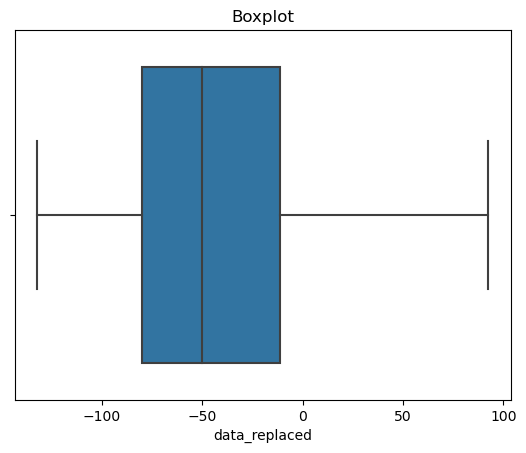

In [46]:
####################### 2.Replace ############################
# Now let's replace the outliers by the maximum and minimum limit
data['data_replaced']= pd.DataFrame(np.where(data['output'] > upper_limit, upper_limit,
                                         np.where(data['output'] < lower_limit, lower_limit,
                                                  data['output'])))
                                 
sns.boxplot(data.data_replaced);plt.title('Boxplot');plt.show()

#we see no outiers

#### feature engineering

In [48]:
#Standardization
# Normalization function using z std. all are continuous data.
def norm_func(i):
    x = (i-i.mean())/(i.std()) 
    return(x)

data.norm = norm_func(data)
data.norm.describe() # mean=0, std = 1

,input,output,data_replaced
count,1.697000e+03,1.697000e+03,1.697000e+03
mean,1.382054e-17,1.750711e-16,-3.901809e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.719415e+00,-1.498589e+00,-1.574081e+00
25%,-8.156705e-01,-7.044412e-01,-7.230316e-01
50%,1.135316e-01,-2.462790e-01,-2.320414e-01
75%,8.772592e-01,3.493318e-01,4.062460e-01
max,1.691902e+00,2.563782e+00,2.100162e+00


In [51]:
#Normalization
# or denominator (i.max()-i.min())
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min()) # or denominator (i.max()-i.min())
    return(x)

data1.norm = norm_func(data)
data1.norm.describe() # min=0, max=1

# We did Standardization and Normalization to make data scale free.

C:\Users\Home\AppData\Local\Temp\ipykernel_13284\4284548899.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data1.norm = norm_func(data)


,input,output,data_replaced
count,1697.000000,1697.000000,1697.000000
mean,0.504033,0.368895,0.428410
std,0.293142,0.246162,0.272165
min,0.000000,0.000000,0.000000
25%,0.264925,0.195489,0.231626
50%,0.537313,0.308271,0.365256
75%,0.761194,0.454887,0.538976
max,1.000000,1.000000,1.000000


In [52]:
print(data['input'].var())
print(data['output'].var())

6171.992889088389
4287.499418368705


In [54]:
np.corrcoef(data.input, data.output) 

array([[1.        , 0.51222285],
       [0.51222285, 1.        ]])

In [55]:
cov_output = np.cov(data.input, data.output)[0, 1]

cov_output

2634.957973838404

In [56]:
# Import library

import statsmodels.formula.api as smf

In [57]:

# Simple Linear Regression

model = smf.ols('output ~ input', data = data).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 output   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     602.9
Date:                Sat, 11 Feb 2023   Prob (F-statistic):          3.71e-114
Time:                        16:18:38   Log-Likelihood:                -9245.6
No. Observations:                1697   AIC:                         1.850e+04
Df Residuals:                    1695   BIC:                         1.851e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.3353      1.366    -25.142      0.000     -37.014     -31.657
input          0.4269      0.017     24.554      0.000       0.393       0.461
==============================================================================
Omnibus:                      404.907   Durbin-Watson:                   0.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1003.115
Skew:                           1.280   Prob(JB):                    1.50e-218
Kurtosis:                       5.762   Cond. No.                         78.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
pred1 = model.predict(pd.DataFrame(data['input']))

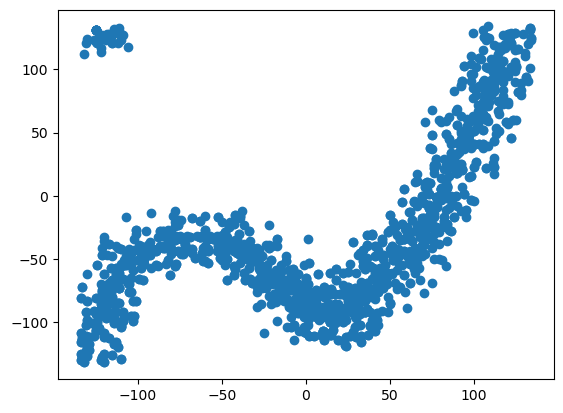

In [59]:
# Regression Line

plt.scatter(data.input, data.output)

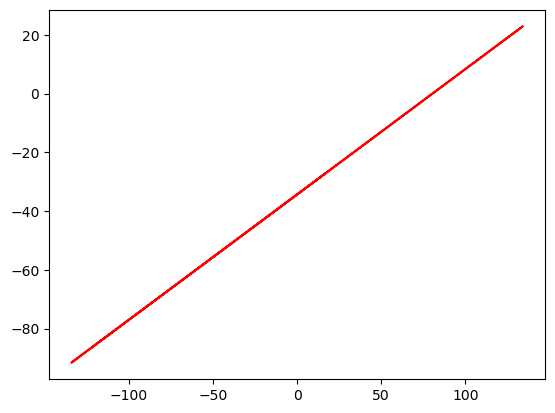

In [60]:
plt.plot(data.input, pred1, "r")

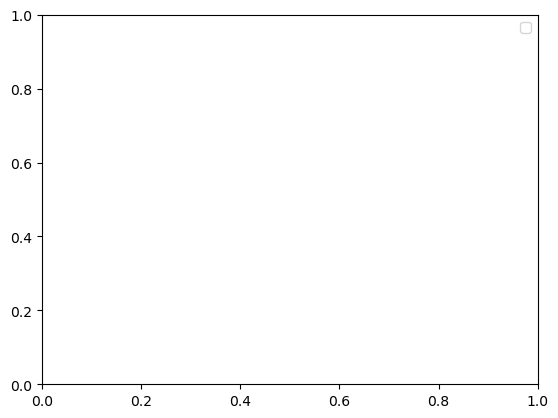

In [61]:
plt.legend(['Predicted line', 'Observed data'])

In [62]:
plt.show()

In [63]:
# Error calculation

res1 = data.output - pred1

res_sqr1 = res1 * res1

mse1 = np.mean(res_sqr1)

rmse1 = np.sqrt(mse1)

rmse1

56.22023597692276

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


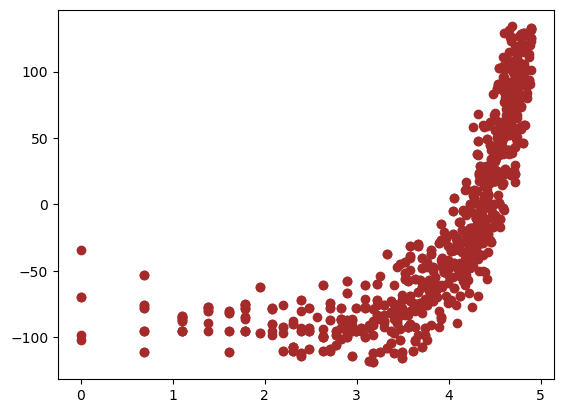

In [64]:
######### Model building on Transformed Data

# Log Transformation

# x = log(waist); y = at

plt.scatter(x = np.log(data['input']), y = data['output'], color = 'brown')

In [65]:
np.corrcoef(np.log(data.input), data.output) #correlation

array([[nan, nan],
       [nan,  1.]])

In [66]:
model2 = smf.ols('output ~ np.log(input)', data = data).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 output   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 11 Feb 2023   Prob (F-statistic):                nan
Time:                        16:23:47   Log-Likelihood:                    nan
No. Observations:                 943   AIC:                               nan
Df Residuals:                     943   BIC:                               nan
Df Model:                          -1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept            nan        nan        nan        nan         nan         nan
np.log(input)        nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                          nan
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
pred2 = model2.predict(pd.DataFrame(data['input']))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


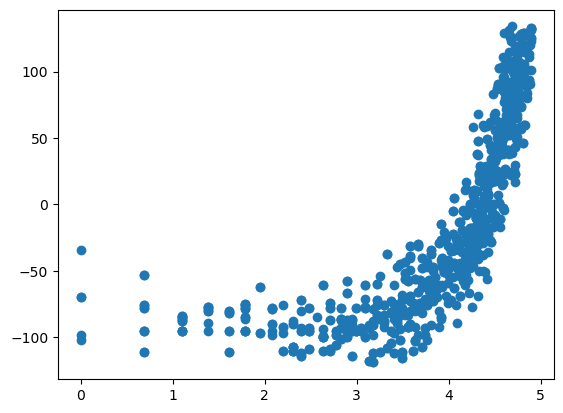

In [68]:
# Regression Line

plt.scatter(np.log(data.input), data.output)

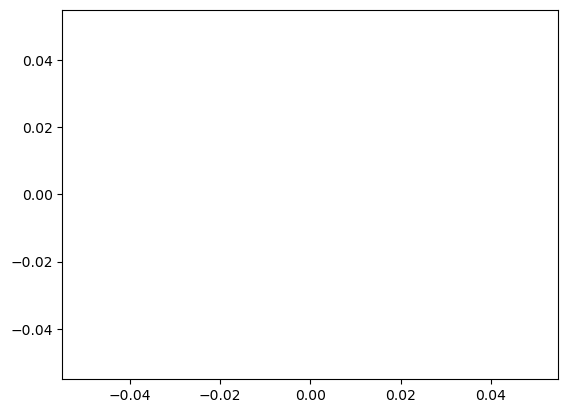

In [69]:
plt.plot(np.log(data.input), pred2, "r")

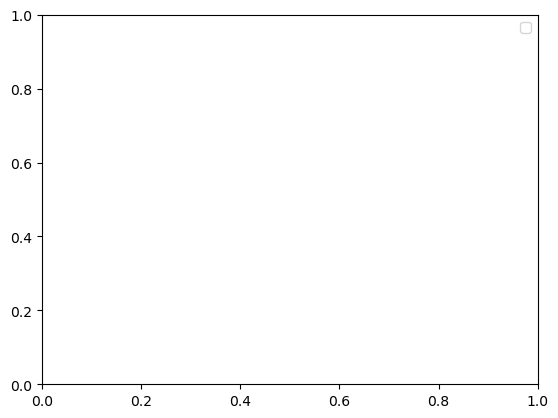

In [70]:
plt.legend(['Predicted line', 'Observed data'])

In [71]:
plt.show()

In [72]:
# Error calculation

res2 = data.output - pred2

res_sqr2 = res2 * res2

mse2 = np.mean(res_sqr2)

rmse2 = np.sqrt(mse2)

rmse2

nan

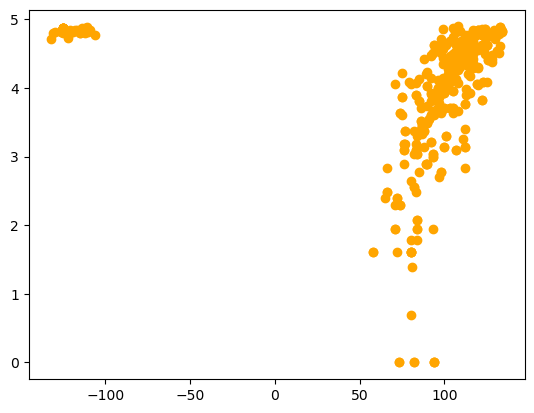

In [73]:
#### Exponential transformation

# x = waist; y = log(at)

plt.scatter(x = data['input'], y = np.log(data['output']), color = 'orange')

In [74]:
np.corrcoef(data.input, np.log(data.output)) #correlation

array([[ 1., nan],
       [nan, nan]])

In [75]:
model3 = smf.ols('np.log(output) ~ input', data = data).fit()

model3.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(output)   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 11 Feb 2023   Prob (F-statistic):                nan
Time:                        16:28:21   Log-Likelihood:                    nan
No. Observations:                 384   AIC:                               nan
Df Residuals:                     382   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept        -inf        nan        nan        nan         nan         nan
input             nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
pred3 = model3.predict(pd.DataFrame(data['input']))

pred3_at = np.exp(pred3)

pred3_at

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1692   NaN
1693   NaN
1694   NaN
1695   NaN
1696   NaN
Length: 1697, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


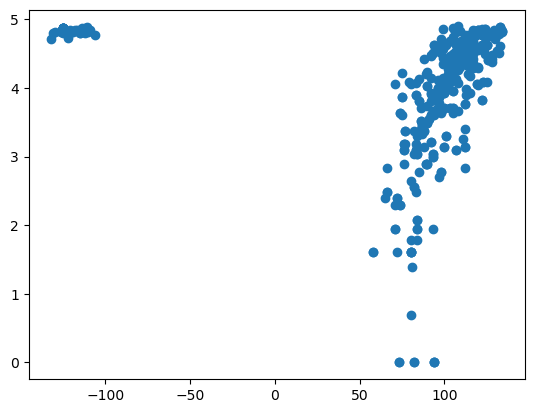

In [77]:
# Regression Line

plt.scatter(data.input, np.log(data.output))

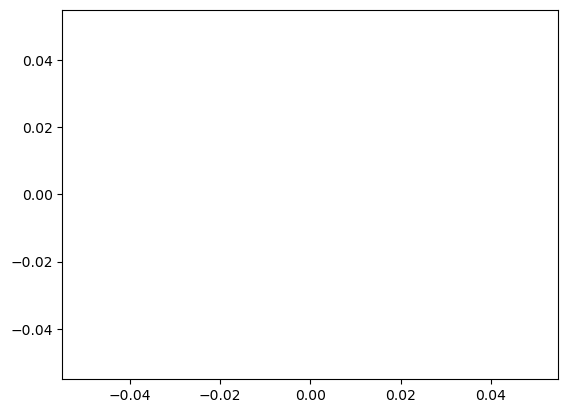

In [78]:
plt.plot(data.input, pred3, "r")

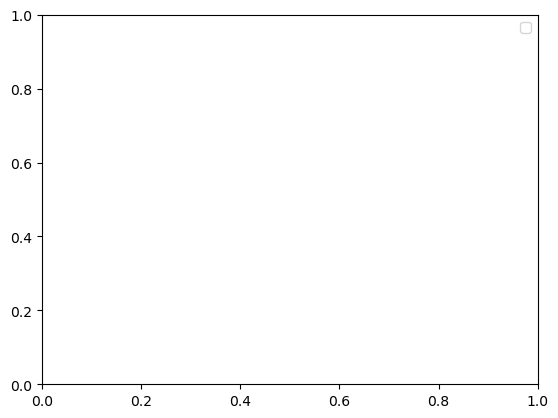

In [79]:
plt.legend(['Predicted line', 'Observed data'])

In [80]:
plt.show()

In [81]:
# Error calculation

res3 = data.output - pred3_at

res_sqr3 = res3 * res3

mse3 = np.mean(res_sqr3)

rmse3 = np.sqrt(mse3)

rmse3

nan

In [83]:
import datetime as DT

In [84]:
model4 = smf.ols('np.log(output) ~ input + I(DT*DT)', data = data).fit()
model4.summary()

pred4 = model4.predict(pd.DataFrame(data))
pred4_at = np.exp(pred4)
pred4_at

PatsyError: Error evaluating factor: TypeError: unsupported operand type(s) for *: 'module' and 'module'
    np.log(output) ~ input + I(DT*DT)
                             ^^^^^^^^

In [ ]:
# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = data.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)

In [ ]:
plt.scatter(data.input, np.log(data.output))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [ ]:
# Error calculation
res4 = data.output - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4


In [ ]:
# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

In [ ]:
# The best model

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.2)

finalmodel = smf.ols('np.log(output) ~ input + I(input*input)', data = train).fit()
finalmodel.summary()

In [ ]:
# Predict on test data
test_pred = finalmodel.predict(pd.DataFrame(test))
pred_test_output = np.exp(test_pred)
pred_test_output

In [ ]:
# Model Evaluation on Test data
test_res = test.output - pred_test_input
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse


In [ ]:
# Prediction on train data
train_pred = finalmodel.predict(pd.DataFrame(train))
pred_train_output = np.exp(train_pred)
pred_train_output

In [ ]:
# Model Evaluation on train data
train_res = train.output- pred_train_output
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse



In [ ]:
RESULT: As we have recorded the RMSE values, Correlation coefficient values for different transformation models.

#### conclusion : best model is SLR